# Example: Likelihood fitting a Bivariate Gaussian

In this example, we shall perform likelihood fitting to a [bivariate normal
distribution](http://mathworld.wolfram.com/BivariateNormalDistribution.html),
to demonstrate how ``symfit``'s API can easily be used to perform likelihood
fitting on multivariate problems.

In this example, we sample from a bivariate normal distribution with a
significant correlation of $\rho = 0.6$ between $x$ and $y$.
We see that this is extracted from the data relatively straightforwardly.


In [13]:
import numpy as np
from symfit import Variable, Parameter, Fit
from symfit.core.objectives import LogLikelihood
from symfit.distributions import BivariateGaussian
import matplotlib.pyplot as plt


Build a model corresponding to a bivariate normal distribution.

In [14]:
x = Variable('x')
y = Variable('y')
x0 = Parameter('x0', value=0.6, min=0.5, max=0.7)
sig_x = Parameter('sig_x', value=0.1, max=1.0)
y0 = Parameter('y0', value=0.7, min=0.6, max=0.9)
sig_y = Parameter('sig_y', value=0.05, max=1.0)
rho = Parameter('rho', value=0.001, min=-1, max=1)

pdf = BivariateGaussian(x=x, mu_x=x0, sig_x=sig_x, y=y, mu_y=y0,
                       sig_y=sig_y, rho=rho)


Generate mock data


In [15]:
# Draw 100000 samples from a bivariate distribution
mean = [0.59, 0.8]
corr = 0.6
cov = np.array([[0.11 ** 2, 0.11 * 0.23 * corr],
                [0.11 * 0.23 * corr, 0.23 ** 2]])
np.random.seed(42)
xdata, ydata = np.random.multivariate_normal(mean, cov, 100000).T


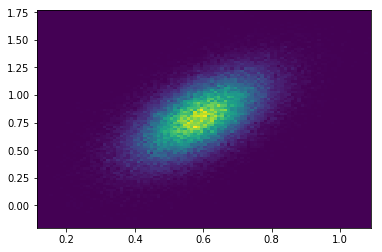

In [16]:
hist = plt.hist2d(xdata, ydata, bins=(100, 100))


Finally, we perform the fit to this mock data using the ``LogLikelihood`` objective.

In [17]:
fit = Fit(pdf, x=xdata, y=ydata, objective=LogLikelihood)
fit_result = fit.execute()
print(fit_result)


Parameter Value        Standard Deviation
rho       6.026420e-01 2.013810e-03
sig_x     1.100898e-01 2.461684e-04
sig_y     2.303400e-01 5.150556e-04
x0        5.901317e-01 3.481346e-04
y0        8.014040e-01 7.283990e-04
Status message         b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Number of iterations   22
Objective              <symfit.core.objectives.LogLikelihood object at 0x000001DA8EB8BF28>
Minimizer              <symfit.core.minimizers.LBFGSB object at 0x000001DA8EB6E7B8>

Goodness of fit qualifiers:
likelihood             inf
log_likelihood         106241.24669486462
objective_value        -106241.24669486462


We see that this result is in agreement with our data.